In [1]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.6 MB/s eta 0:00:00


In [2]:
from huggingface_hub import notebook_login

notebook_login()

In [3]:
pip install Pillow


In [4]:
import os
import tarfile
from huggingface_hub import hf_hub_download
from PIL import Image
from datasets import Dataset, Image as DatasetsImage

# -------------------------------
# Partie 1 : Télécharger et extraire le tar
# -------------------------------

repo_id = "Team198523/dataset_image"  # URL du repo
filename = "candle.tar"
revision = "main"  # Branche utilisée

# Télécharger le fichier TAR (sans afficher le chemin téléchargé)
tar_path = hf_hub_download(
    repo_id=repo_id,
    filename=filename,
    repo_type="dataset",
    revision=revision
)

# Spécifier le dossier de destination pour l'extraction
extract_path = "candle_extracted"
os.makedirs(extract_path, exist_ok=True)

# Décompresser l'archive TAR dans le dossier d'extraction
with tarfile.open(tar_path, "r:*") as tar:
    tar.extractall(path=extract_path)

# -------------------------------
# Partie 2 : Charger l'image et créer un dataset
# -------------------------------

# Construire le chemin complet vers l'image extraite
# Adaptation en fonction de la structure : ici, on suppose que l'archive contient un dossier "candle"
image_path = os.path.join(extract_path, "candle", "Data", "Images", "Anomaly", "000.JPG")

# Créer un dataset à partir de la liste de chemins d'images
dataset = Dataset.from_dict({"image": [image_path]})

# Utiliser cast_column() pour transformer la colonne "image" en objet PIL avec la feature Image()
dataset = dataset.cast_column("image", DatasetsImage())

# Charger et afficher la première image du dataset
image_from_dataset = dataset[0]["image"]
image_from_dataset.show()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


candle.tar:   0%|          | 0.00/129M [00:00<?, ?B/s]

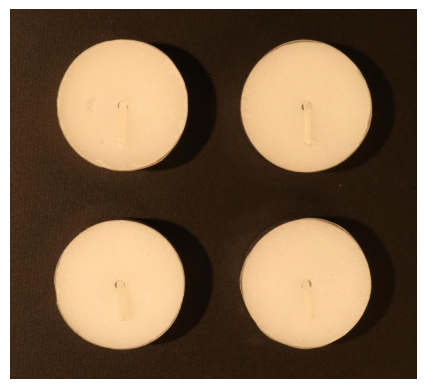

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("candle_extracted/candle/Data/Images/Anomaly/000.JPG")
plt.imshow(image)
plt.axis("off")
plt.show()


# Let's try now with the big file


In [6]:
import os
import tarfile
from huggingface_hub import hf_hub_download
from PIL import Image
from datasets import Dataset, Image as DatasetsImage

# -------------------------------
# Partie 1 : Télécharger et extraire le tar
# -------------------------------

repo_id = "Team198523/dataset_image"  # URL du repo
filename = "VisA_20220922.tar"
revision = "main"  # Branche utilisée

# Télécharger le fichier TAR (sans afficher le chemin téléchargé)
tar_path = hf_hub_download(
    repo_id=repo_id,
    filename=filename,
    repo_type="dataset",
    revision=revision
)

# Spécifier le dossier de destination pour l'extraction
extract_path = "VisA_20220922_extracted"
os.makedirs(extract_path, exist_ok=True)

# Décompresser l'archive TAR dans le dossier d'extraction
with tarfile.open(tar_path, "r:*") as tar:
    tar.extractall(path=extract_path)

# -------------------------------
# Partie 2 : Charger l'image et créer un dataset
# -------------------------------

# Construire le chemin complet vers l'image extraite
# Adaptation en fonction de la structure : ici, on suppose que l'archive contient un dossier "candle"
image_path = os.path.join(extract_path, "candle", "Data", "Images", "Anomaly", "000.JPG")

# Créer un dataset à partir de la liste de chemins d'images
dataset = Dataset.from_dict({"image": [image_path]})

# Utiliser cast_column() pour transformer la colonne "image" en objet PIL avec la feature Image()
dataset = dataset.cast_column("image", DatasetsImage())

# Charger et afficher la première image du dataset
image_from_dataset = dataset[0]["image"]
image_from_dataset.show()


VisA_20220922.tar:   0%|          | 0.00/1.93G [00:00<?, ?B/s]

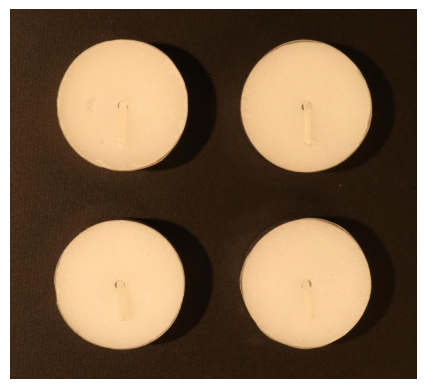

In [7]:
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("candle_extracted/candle/Data/Images/Anomaly/000.JPG")
plt.imshow(image)
plt.axis("off")
plt.show()


import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("candle_extracted/candle/Data/Images/Anomaly/000.JPG")
plt.imshow(image)
plt.axis("off")
plt.show()


In [17]:
def build_dataset(base_path):
    image_paths = []
    labels = []
    categories = []

    for category in os.listdir(base_path):
        category_path = os.path.join(base_path, category)
        if not os.path.isdir(category_path):
            continue

        category_images_path = os.path.join(category_path, "Data", "Images")

        # Images normales
        normal_path = os.path.join(category_images_path, "Normal")
        if os.path.exists(normal_path):
            for img in os.listdir(normal_path):
                image_paths.append(os.path.join(normal_path, img))
                labels.append(0)  # Normal
                categories.append(category)

        # Images anomalies
        anomaly_path = os.path.join(category_images_path, "Anomaly")
        if os.path.exists(anomaly_path):
            for img in os.listdir(anomaly_path):
                image_paths.append(os.path.join(anomaly_path, img))
                labels.append(1)  # Anomalie
                categories.append(category)

    return Dataset.from_dict({
        "image_path": image_paths,
        "label": labels,
        "category": categories
    })

In [19]:
dataset = build_dataset(extract_path)
print(dataset)
print(dataset[:5])

Dataset({
    features: ['image_path', 'label', 'category'],
    num_rows: 10821
})
{'image_path': ['VisA_20220922_extracted/macaroni2/Data/Images/Normal/0747.JPG', 'VisA_20220922_extracted/macaroni2/Data/Images/Normal/0097.JPG', 'VisA_20220922_extracted/macaroni2/Data/Images/Normal/0546.JPG', 'VisA_20220922_extracted/macaroni2/Data/Images/Normal/0447.JPG', 'VisA_20220922_extracted/macaroni2/Data/Images/Normal/0402.JPG'], 'label': [0, 0, 0, 0, 0], 'category': ['macaroni2', 'macaroni2', 'macaroni2', 'macaroni2', 'macaroni2']}


In [20]:
# Diviser en 80% entrainement, 20% test
dataset_split = dataset.train_test_split(test_size=0.2)

train_dataset = dataset_split['train']
val_dataset = dataset_split['test']

print(f"Nombre d'images d'entraînement : {len(train_dataset)}")
print(f"Nombre d'images de test : {len(val_dataset)}")

Nombre d'images d'entraînement : 8656
Nombre d'images de test : 2165
